# Exploratory Data Analysis
## EDA of Startup dataset from Kaggle

In [27]:
# Importing Required Modules

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [28]:
df = pd.read_csv("IndianStartup.csv")
print(df.shape)
df.sample(5)

(1209, 10)


,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
1019,Chirrup,2020.0,Bangalore,Gaming,Video integrated social-gaming platform,"Vipul Garg, Sourav Lashkari, Mehul Mittal","Titan Capital, iSeed, First Cheque, 3.0 Fund.","$300,000",Pre-seed,Mar-2021
808,NIRAMAI,2016.0,Bangalore,Healthcare,NIRAMAI has developed a novel breast cancer sc...,Geetha Manjunath,CDC Group,$Undisclosed,NaN,Jun-2021
909,Optimized Electrotech,2017.0,Ahmadabad,Aeorspace,"Long distance, multispectral Surveillance Equi...","Anil Yekkala, Dharin Shah, Kuldeep Saxena, Pur...",GVFL,"$1,800,000",Pre-series A,Apr-2021
885,Arthya Wealth and Investments,2020.0,Mumbai,FinTech,"A comprehensive, high quality, open-architectu...",Gaurav Arora,"Rishi Kumar Bagla, Krishen Lal Khanna","$1,000,000",Pre-series A,May-2021
326,Sanctum Wealth,2016.0,Mumbai,Investment Management,Sanctum is an Indian wealth management firm wh...,Shiv Gupta,The Xander Group,"$10,000,000",NaN,Sep-2021


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   Headquarters   1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founder/s      1205 non-null   object 
 6   Investor/s     1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Date           1209 non-null   object 
dtypes: float64(1), object(9)
memory usage: 94.6+ KB


##### The amount column is of Objects type with string type content such as '$' and ','. We need to replace them by '', and convert it to numerica value such as float or integer

In [30]:
df.isna().sum()

Company/Brand      0
Founded            1
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        62
Amount             3
Stage            428
Date               0
dtype: int64

Stage as of now not clear whether usefule feature or not. But removing 428 rows just because of one feature is not present wont be afforadble.

In [31]:
df["Current Year"] = 2021

In [32]:
df["Years_Old"] = df["Current Year"] - df["Founded"]

In [33]:
df.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date,Current Year,Years_Old
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-2021,2021,6.0
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",NaN,Dec-2021,2021,9.0
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-2021,2021,6.0
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",NaN,Dec-2021,2021,3.0
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-2021,2021,0.0


In [34]:
df.isna().sum()

Company/Brand      0
Founded            1
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        62
Amount             3
Stage            428
Date               0
Current Year       0
Years_Old          1
dtype: int64

In [35]:
df = df[["Company/Brand", "Founded", "Headquarters", "Sector", "Founder/s", "Investor/s", "Amount", "Current Year","Years_Old"]]

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(1138, 9)

In [38]:
df.sample(10)

,Company/Brand,Founded,Headquarters,Sector,Founder/s,Investor/s,Amount,Current Year,Years_Old
442,CollegeDekho,2015.0,Gurugram,EdTech,Ruchir Arora,"Winter Capital, ETS, Man Capital","$26,000,000",2021,6.0
164,Recordent,2018.0,Hyderabad,Financial Services,Winny Patro,"Family Office of Kantamaneni, IIM Calcutta Inn...","$400,000",2021,3.0
51,Vedic Cosmeceuticals,2002.0,Noida,Cosmetics,Mohit Goel,Sixth Sense Ventures,"$32,000,000",2021,19.0
203,Rebel Foods,2011.0,Mumbai,Cloud kitchen,"Jaydeep Barman, Kallol Banerjee.",Qatar Investment Authority,"$175,000,000",2021,10.0
988,ReshaMandi,2020.0,Bangalore,AgriTech,Utkarsh Apoorva,"Omnivore, Strive Ventures","$1,700,000",2021,1.0
337,CashBook,2020.0,Gurugram,FinTech,"Vivek, Ashutosh Pathak","JAM, Better Tomorrow Ventures","$2,300,000",2021,1.0
1203,BlackSoil,2016.0,Mumbai,FinTech,Ankur Bansal,Awign Enterprises,"$4,000,000",2021,5.0
673,Licious,2015.0,Bangalore,Food & Beverages,"Abhay Hanjura, Vivek Gupta","Temasek, Multiples PE","$192,000,000",2021,6.0
1079,Zolve,2020.0,Bangalore,FinTech,Raghunandan G,"Kunal Shah, Greg Kidd","$15,000,000",2021,1.0
334,Manch Technologies,2017.0,Bangalore,Information Technology & Services,Suresh Anantpurkar,Bharat Inclusion,"$1,000,000",2021,4.0


In [39]:
df.describe()

,Founded,Current Year,Years_Old
count,1138.000000,1138.0,1138.000000
mean,2016.644991,2021.0,4.355009
std,4.499446,0.0,4.499446
min,1963.000000,2021.0,0.000000
25%,2015.000000,2021.0,1.000000
50%,2018.000000,2021.0,3.000000
75%,2020.000000,2021.0,6.000000
max,2021.000000,2021.0,58.000000


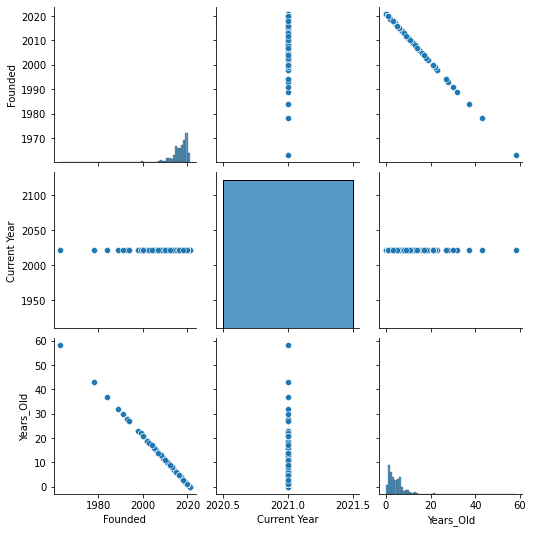

In [15]:
sns.pairplot(df)

In [16]:
city = df["Headquarters"].value_counts().sort_values(ascending=False).head(15)

Text(0.5, 1.0, 'Top cities for Startups')

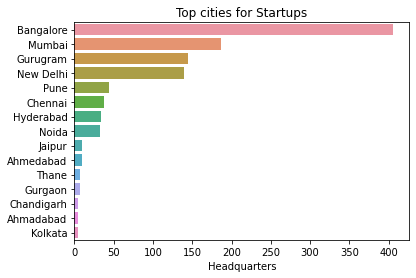

In [17]:
sns.barplot(x=city, y = city.index).set_title("Top cities for Startups")

Text(0.5, 1.0, 'Top sectors for Startups')

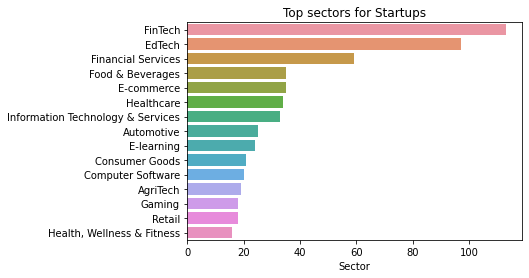

In [18]:
sect = df["Sector"].value_counts().sort_values(ascending=False).head(15)
sns.barplot(x=sect,y=sect.index).set_title("Top sectors for Startups")

In [19]:
df["Amount"].sort_values(ascending=False).head(10)

648     ah! Ventures
455         Upsparks
468         Upsparks
1143     Undisclosed
1133     Undisclosed
950      Undisclosed
1129     Undisclosed
940      Undisclosed
925      Undisclosed
1134     Undisclosed
Name: Amount, dtype: object

In [20]:
df["Amount"] = df["Amount"].convert_dtypes(convert_integer=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1138 non-null   object 
 1   Founded        1138 non-null   float64
 2   Headquarters   1138 non-null   object 
 3   Sector         1138 non-null   object 
 4   Founder/s      1138 non-null   object 
 5   Investor/s     1138 non-null   object 
 6   Amount         1138 non-null   string 
 7   Current Year   1138 non-null   int64  
 8   Years_Old      1138 non-null   float64
dtypes: float64(2), int64(1), object(5), string(1)
memory usage: 121.2+ KB


In [22]:
df["Amount"] = df["Amount"].str.replace("$",'')
df["Amount"] = df["Amount"].str.replace(",",'')
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce')
df.head()

C:\Users\Pratik\AppData\Local\Temp/ipykernel_6168/223488789.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Amount"] = df["Amount"].str.replace("$",'')


,Company/Brand,Founded,Headquarters,Sector,Founder/s,Investor/s,Amount,Current Year,Years_Old
0,CollegeDekho,2015.0,Gurgaon,E-learning,Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,2021,6.0
1,BOX8,2012.0,Mumbai,Food & Beverages,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,2021,9.0
2,Simpl,2015.0,Bangalore,Consumer Services,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,2021,6.0
4,PayGlocal,2021.0,Bangalore,Financial Services,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,2021,0.0
5,Curefit,2016.0,Bangalore,"Health, Wellness & Fitness","Mukesh Bansal, Ankit",Zomato,145000000.0,2021,5.0


Text(0.5, 1.0, 'Worth of top Startups')

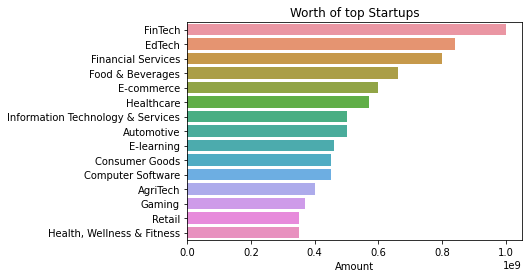

In [23]:
worth = df["Amount"].sort_values(ascending=False).head(15)
sns.barplot(x=worth,y=sect.index).set_title("Worth of top Startups")

Text(0.5, 1.0, 'Top Investor/s for Startups')

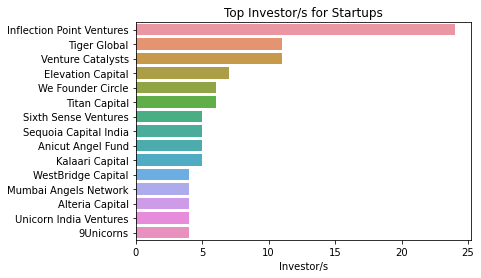

In [24]:
invest = df["Investor/s"].value_counts().sort_values(ascending=False).head(15)
sns.barplot(x=invest,y=invest.index).set_title("Top Investor/s for Startups")

Text(0.5, 1.0, 'Worth of top Startups')

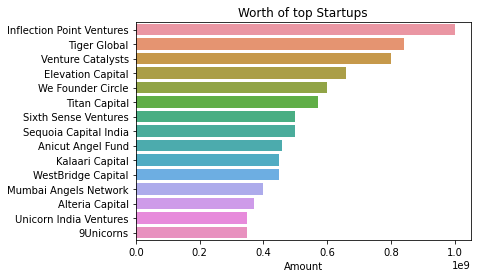

In [25]:
sns.barplot(x=worth,y=invest.index).set_title("Worth of top Startups")

Text(0.5, 1.0, 'Worth of top Startups')

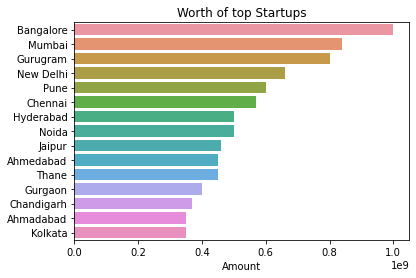

In [26]:
sns.barplot(x=worth,y=city.index).set_title("Worth of top Startups")

### Summary
* Maximum number of the startups are estabhlished in Bengaluru
* Most of the startups are belongs to 'Fintech' Sector and total worth is also highest in 'Fintec'
* Top investor in the study dataset is Inflection Point Ventures
* Most of the funding amount recived for Startups in Mumbai 